# m_cfd_of

Saang Bum Kim <br>
2020-09-21 08:30:46 

In [ ]:
%
%%  PART 0.     Opening
%
fclose all; close all
clc
clear all
tcomp = tic;
telap = toc(tcomp);

s_dir = 'git/openfoam_seo/of/org/Mauritius';

seo_init

id_f = 1;
% id_sv = true;
id_sv = false;
% id_pl = true;
id_pl = false;

% id_jupyter = false;
id_jupyter = true;

In [1]:
clear seo

No port asigned (no p_comsol) !
No comsol mphserver running or already connected!


# Pre Process

In [2]:
s_angle_p = {'00','02','m2','04','m4','06','m6'};
angle_p   = [  0 ,  2 , -2 ,  4 , -4 ,  6 , -6];

In [4]:
id_angle = 5;

In [7]:
al = -angle_p(id_angle)*pi/180;
fprintf('Angle of attack: %d',(al*180/pi))
s_angle = s_angle_p(id_angle)

Angle of attack: 4
s_angle =

  1x1 cell array

    {'m4'}



## from CSL: YJN2, rib

In [1]:
cd ~/Work/git/openfoam_seo/wtt/yjn2/

In [2]:
load rib_upper_laminarTa_Re150.mat

In [3]:
model = mphload('rib_upper_laminar_Re150.mph')

Error using eval
Unrecognized function or variable 'mphload'.



In [4]:
% mphmesh(model)
% x = model.mesh("mesh1").getVertex();

Error using eval
Unrecognized function or variable 'model'.



In [6]:
[meshstats,meshdata] = mphmeshstats(model);

Error using eval
Unrecognized function or variable 'model'.



In [8]:
c_box1 = mpheval(model,'X','selection','box1')
c_box2 = mpheval(model,'X','selection','box2')
c_box3 = mpheval(model,'X','selection','box3')

Error using eval
Unrecognized function or variable 'model'.



In [ ]:
% save imsi200921 x meshdata c_box1 c_box2 c_box3

In [9]:
whos -file imsi200921 
load imsi200921 

  Name          Size               Bytes  Class     Attributes

  c_box1        1x1                10868  struct              
  c_box2        1x1                 6044  struct              
  c_box3        1x1                 6044  struct              
  meshdata      1x1               432478  struct              
  x             2x9868            157888  double              



In [11]:
c_box1
c_box1.d1(1:3)
c_box1.p(:,1:3)
c_box1.t(:,1:3)
c_box1.ve(1:3,:)


c_box1 = 

  struct with fields:

    expr: {'X'}
      d1: [1x268 double]
       p: [2x268 double]
       t: [2x268 int32]
      ve: [268x1 int32]
    unit: {'m'}


ans =

   -0.0668   -0.0668   -0.0405


ans =

   -0.0668   -0.0668   -0.0405
    0.0004   -0.0000   -0.0036


ans =

  2x3 int32 matrix

   0   2   4
   1   3   2


ans =

  3x1 int32 column vector

   1
   1
   2



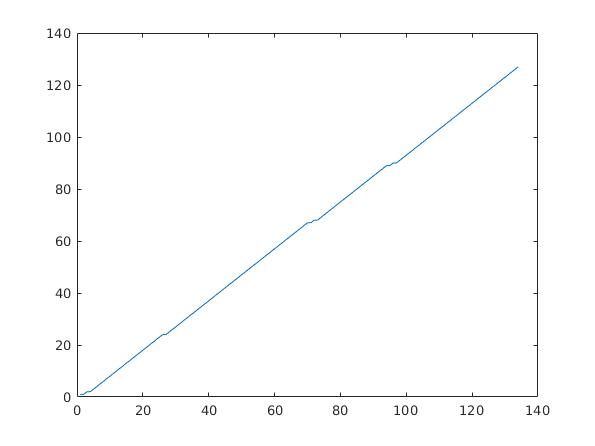

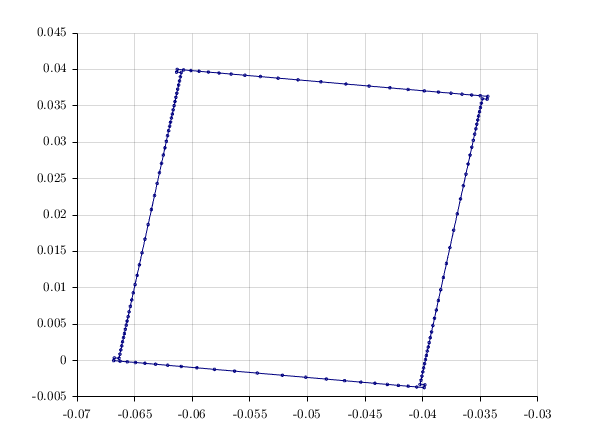

In [16]:
id_pause = true;
figure(1)
for ii=1:size(c_box2.t,2)
    id = c_box2.t(:,ii)+1;
    x_id = c_box2.p(:,id);
% plot(c_box1.p(1,ii),c_box1.p(2,ii),'o','MarkerSize',6-4)
plot(x_id(1,:),x_id(2,:),'-o','MarkerSize',6-4,'Color',rgb('Navy'))
    if id_pause
        gcfG;gcfH;gcfLFont;gcfS;%gcfP
        id_pause = false;
    end
end
figure(2)
plot(c_box2.ve)

In [ ]:
fid = fopen(sprintf('blockMeshDict_%s.foam',datestr(now,'yymmdd')),'w+');
f_bl.write('#\n')
f_bl.write('#   d_openFoam\n')
f_bl.write('#   Author: Saang Bum Kim, sbkim1601@gmail.com\n')
f_bl.write('#   Date  : 2017-08-25T16:55:40+09:00\n')
f_bl.write('#\n')

for ii=1:size(meshdata.vertex,2)
    meshdata.vertex
    fprintf(fid,'',meshdata.vertex(:,ii))
end

# Main Process

# Post Process

# FINE